In [63]:
import os
import glob
import csv
import pandas as pd
from scipy.io import loadmat

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [153]:
reals = glob.glob('../../../datasets/Data_27012021_noisy/real/*_speed.csv')
reals.sort()
print (reals)

['../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM10Hz_paliers_0to120PercTnom_Data_speed.csv', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM20Hz_TorqueSteps_20190419_Data_speed.csv', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM30Hz_paliers_0to120PercTnom_Data_speed.csv', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM45Hz_TorqueSteps_20190419_Data_speed.csv', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM50Hz_paliers_0to120PercTnom_Data_speed.csv', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM60Hz_TorqueSteps_20190419_Data_speed.csv', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM68Hz_paliers_0to120PercTnom_Data_speed.csv', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_NoLM_SpeedVariations2_20190419_Data_speed.csv', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_NoLM_SpeedVariations_20190419_Data_speed.csv', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_NoLM_paliers_0to100Hz_Data_speed.csv']


In [170]:
speed_lbl = pd.read_csv(reals[9], delimiter='\t', header=None, names=['Start', 'End', 'Label'])
speed_lbl['Label'] = speed_lbl.Label.replace("'", "")
torque_lbl = pd.read_csv(reals[9].replace('speed', 'torque'), delimiter='\t', header=None, names=['Start', 'End', 'Label'])
torque_lbl['Label'] = torque_lbl.Label.replace("'", "")  
print (speed_lbl)
print (torque_lbl)

   Start   End       Label
0   1068  1129  'Dynamics'
1   1895  1936  'Dynamics'
2   2763  2863  'Dynamics'
3   3602  3727  'Dynamics'
4   4586  4786  'Dynamics'
5   5395  5598  'Dynamics'
6   6203  6418  'Dynamics'
7   7050  7282  'Dynamics'
8   8054  8511  'Dynamics'
9   9014  9461  'Dynamics'
    Start    End           Label
0    1060   1121      'Dynamics'
1    1136   1891  'Oscillations'
2    1894   1953      'Dynamics'
3    1958   2774   'Instability'
4    2780   2828      'Dynamics'
5    3564   3792      'Dynamics'
6    4547   4862      'Dynamics'
7    5350   5669      'Dynamics'
8    6155   6500      'Dynamics'
9    7002   7359      'Dynamics'
10   8021   8151      'Dynamics'
11   8382   8525      'Dynamics'
12   8962   9082      'Dynamics'
13   8158   8367   'Instability'
14   9083   9372   'Instability'
15   8546   8962   'Instability'
16   9373   9539      'Dynamics'
17   9543  10195   'Instability'
18  10194  10223      'Dynamics'


In [175]:
data = loadmat(reals[9].replace('_speed.csv', '.mat'))

In [176]:
speed = data['speed'][0]
torque = data['torque'][0]
time = data['time'][0]

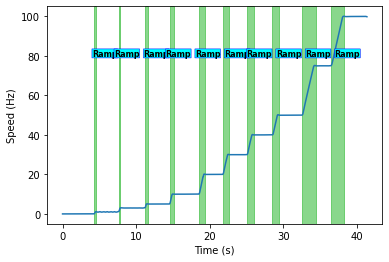

In [179]:
colors = {'Oscillations': sns.xkcd_rgb['grey'],
          'Instability': sns.xkcd_rgb['orange'],
          'Dynamics': sns.xkcd_rgb['green']}
bbox_props = dict(boxstyle="round4, pad=0", fc="cyan", ec="b", lw=.5)
class_map = {'Oscillations': ['Osc',80],
          'Instability': ['Inst', 80],
          'Dynamics': ['Ramp', 80]}

plt.plot(time, speed)
for i in range(speed_lbl.shape[0]):
    plt.axvspan(time[speed_lbl.iloc[i]['Start']], time[speed_lbl.iloc[i]['End']], color=colors[speed_lbl.iloc[i]['Label'].replace("'", "")], alpha=0.5)
    plt.annotate(class_map[speed_lbl.iloc[i]['Label'].replace("'", "")][0],
            fontsize=8,
            fontweight='bold',
            xy=((time[speed_lbl.iloc[i]['Start']] + time[speed_lbl.iloc[i]['End']]) // 2, class_map[speed_lbl.iloc[i]['Label'].replace("'", "")][1]),  
            xycoords='data',
            xytext=(0, 0),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props)  
    
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')
plt.savefig('Speed_instab.png', dpi=300)

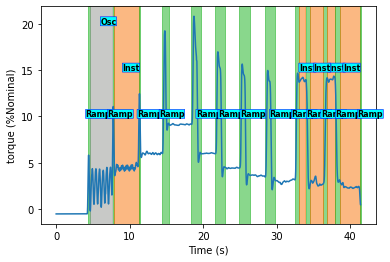

In [182]:
colors = {'Oscillations': sns.xkcd_rgb['grey'],
          'Instability': sns.xkcd_rgb['orange'],
          'Dynamics': sns.xkcd_rgb['green']}
bbox_props = dict(boxstyle="round4, pad=0", fc="cyan", ec="b", lw=.5)
class_map = {'Oscillations': ['Osc', 20],
          'Instability': ['Inst', 15],
          'Dynamics': ['Ramp', 10]}

plt.plot(time, torque)
for i in range(torque_lbl.shape[0]):
    plt.axvspan(time[torque_lbl.iloc[i]['Start']], time[torque_lbl.iloc[i]['End']], color=colors[torque_lbl.iloc[i]['Label'].replace("'", "")], alpha=0.5)
    plt.annotate(class_map[torque_lbl.iloc[i]['Label'].replace("'", "")][0],
            fontsize=8,
            fontweight='bold',
            xy=((time[torque_lbl.iloc[i]['Start']] + time[torque_lbl.iloc[i]['End']]) // 2, class_map[torque_lbl.iloc[i]['Label'].replace("'", "")][1]),  
            xycoords='data',
            xytext=(0, 0),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props)  
    
plt.xlabel('Time (s)')
plt.ylabel('torque (%Nominal)')
plt.savefig('Torque_instab.png', dpi=300)

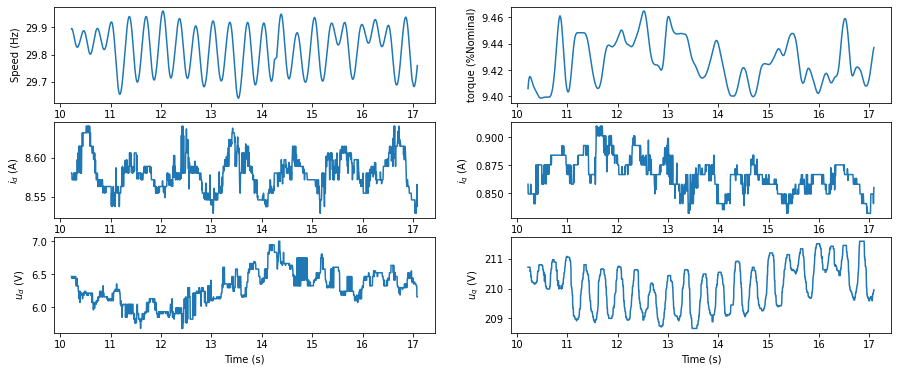

In [145]:
figure = plt.figure(figsize=(15,6))
plt.subplot(3,2,1)
plt.plot(time[2522:4230], speed[2522:4230])
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')

plt.subplot(3,2,2)
plt.plot(time[2522:4230], torque[2522:4230])
plt.xlabel('Time (s)')
plt.ylabel('torque (%Nominal)')


plt.subplot(3,2,3)
plt.plot(time[2522:4230], data['noisy_current_d'][0][2522:4230])
plt.xlabel('Time (s)')
plt.ylabel(r'$i_d$ (A)')


plt.subplot(3,2,4)
plt.plot(time[2522:4230], data['noisy_current_q'][0][2522:4230])
plt.xlabel('Time (s)')
plt.ylabel(r'$i_q$ (A)')

plt.subplot(3,2,5)
plt.plot(time[2522:4230], data['noisy_voltage_d'][0][2522:4230])
plt.xlabel('Time (s)')
plt.ylabel(r'$u_d$ (V)')

plt.subplot(3,2,6)
plt.plot(time[2522:4230], data['noisy_voltage_q'][0][2522:4230])
plt.xlabel('Time (s)')
plt.ylabel(r'$u_q$ (V)')


plt.savefig('osc.png', dpi=300)

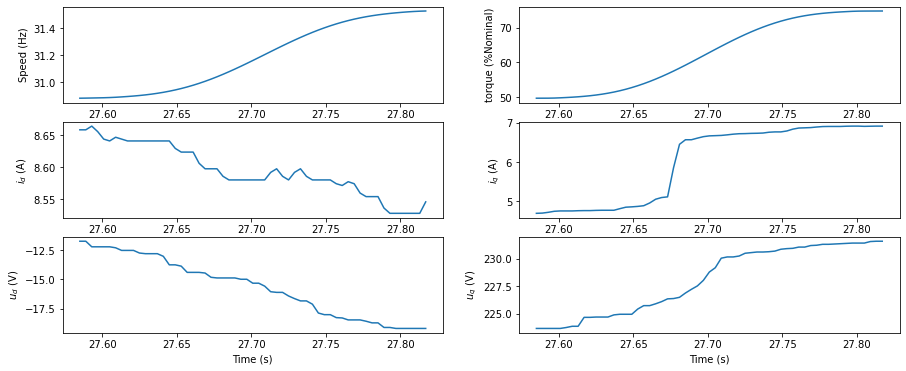

In [147]:
st = 6817
et = 6876

figure = plt.figure(figsize=(15,6))
plt.subplot(3,2,1)
plt.plot(time[st:et], speed[st:et])
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')

plt.subplot(3,2,2)
plt.plot(time[st:et], torque[st:et])
plt.xlabel('Time (s)')
plt.ylabel('torque (%Nominal)')


plt.subplot(3,2,3)
plt.plot(time[st:et], data['noisy_current_d'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel(r'$i_d$ (A)')


plt.subplot(3,2,4)
plt.plot(time[st:et], data['noisy_current_q'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel(r'$i_q$ (A)')

plt.subplot(3,2,5)
plt.plot(time[st:et], data['noisy_voltage_d'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel(r'$u_d$ (V)')

plt.subplot(3,2,6)
plt.plot(time[st:et], data['noisy_voltage_q'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel(r'$u_q$ (V)')


plt.savefig('ramp.png', dpi=300)

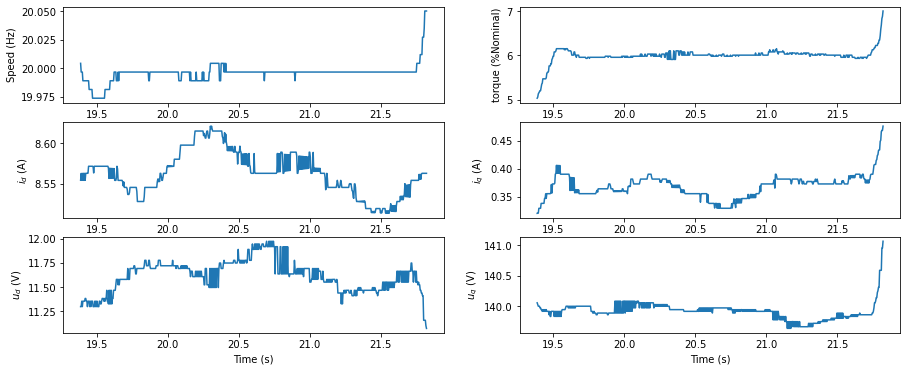

In [185]:
st = 4786
et = 5395

figure = plt.figure(figsize=(15,6))
plt.subplot(3,2,1)
plt.plot(time[st:et], data['noisy_speed'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')

plt.subplot(3,2,2)
plt.plot(time[st:et], data['noisy_torque'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel('torque (%Nominal)')


plt.subplot(3,2,3)
plt.plot(time[st:et], data['noisy_current_d'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel(r'$i_d$ (A)')


plt.subplot(3,2,4)
plt.plot(time[st:et], data['noisy_current_q'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel(r'$i_q$ (A)')

plt.subplot(3,2,5)
plt.plot(time[st:et], data['noisy_voltage_d'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel(r'$u_d$ (V)')

plt.subplot(3,2,6)
plt.plot(time[st:et], data['noisy_voltage_q'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel(r'$u_q$ (V)')


plt.savefig('static.png', dpi=300)

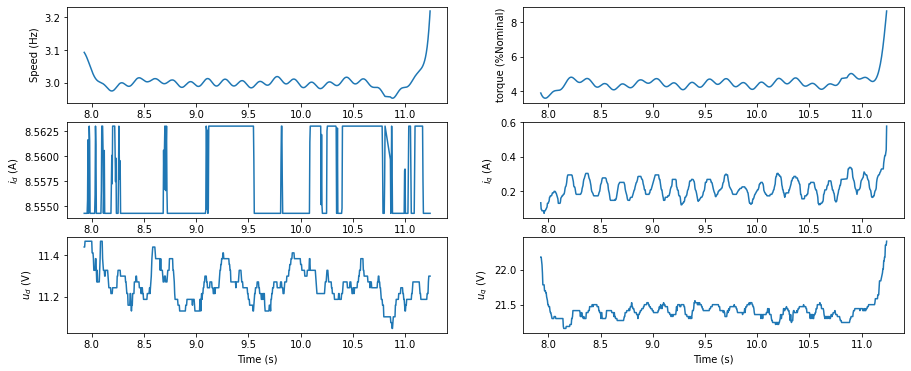

In [177]:
st = 1958    
et = 2774

figure = plt.figure(figsize=(15,6))
plt.subplot(3,2,1)
plt.plot(time[st:et], speed[st:et])
plt.xlabel('Time (s)')
plt.ylabel('Speed (Hz)')

plt.subplot(3,2,2)
plt.plot(time[st:et], torque[st:et])
plt.xlabel('Time (s)')
plt.ylabel('torque (%Nominal)')


plt.subplot(3,2,3)
plt.plot(time[st:et], data['noisy_current_d'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel(r'$i_d$ (A)')


plt.subplot(3,2,4)
plt.plot(time[st:et], data['noisy_current_q'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel(r'$i_q$ (A)')

plt.subplot(3,2,5)
plt.plot(time[st:et], data['noisy_voltage_d'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel(r'$u_d$ (V)')

plt.subplot(3,2,6)
plt.plot(time[st:et], data['noisy_voltage_q'][0][st:et])
plt.xlabel('Time (s)')
plt.ylabel(r'$u_q$ (V)')


plt.savefig('instab.png', dpi=300)